<a href="https://colab.research.google.com/github/rixprakash/Jarheads/blob/main/Project%201/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/rixprakash/Jarheads

Cloning into 'Jarheads'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 50 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 8.66 MiB | 6.47 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [5]:
import pandas as pd
data1 = pd.read_csv('/content/Jarheads/Project 1/tcc_ceds_music.csv')
data2 = pd.read_csv('/content/Jarheads/Project 1/tcc_ceds_music_2.csv')
music = pd.concat([data2, data1], ignore_index=True)

In [6]:
music.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [7]:
music.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

<ipython-input-12-458b94568324>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  music['lyrics'].fillna('', inplace=True)  # Replace NaN with empty strings


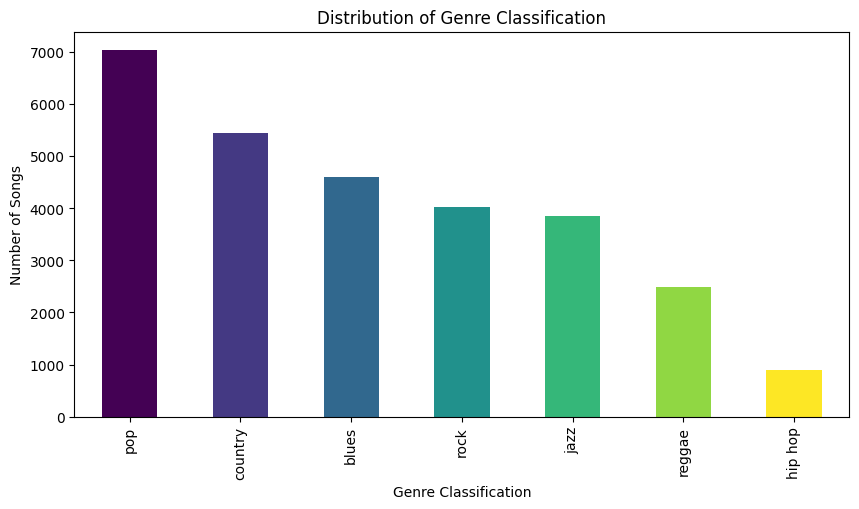

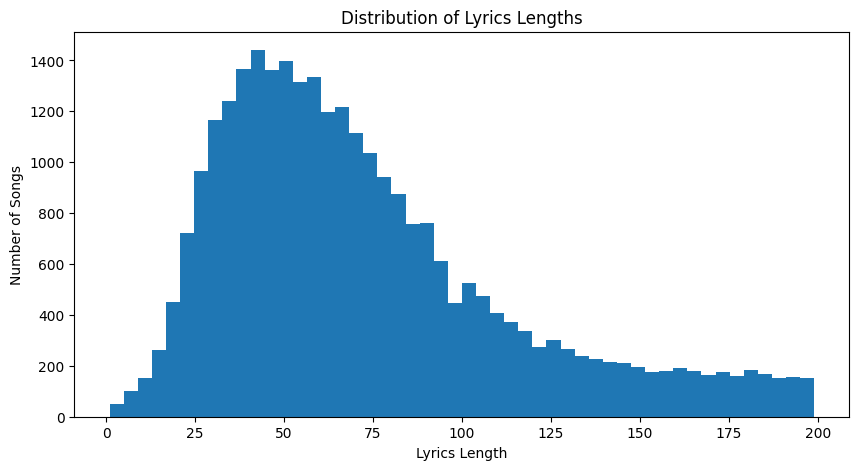

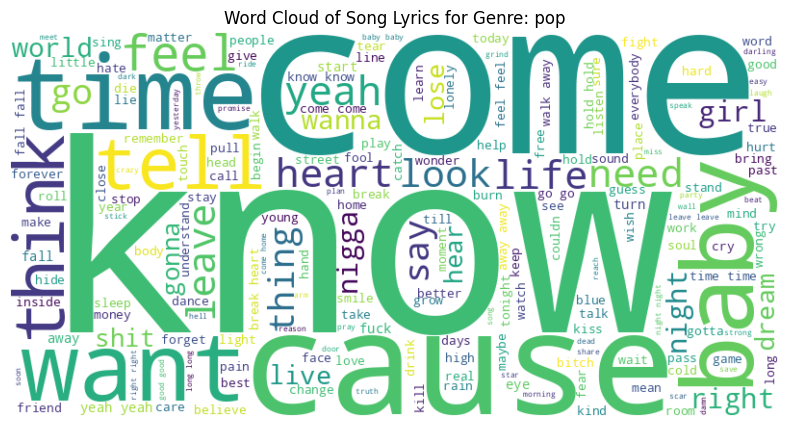

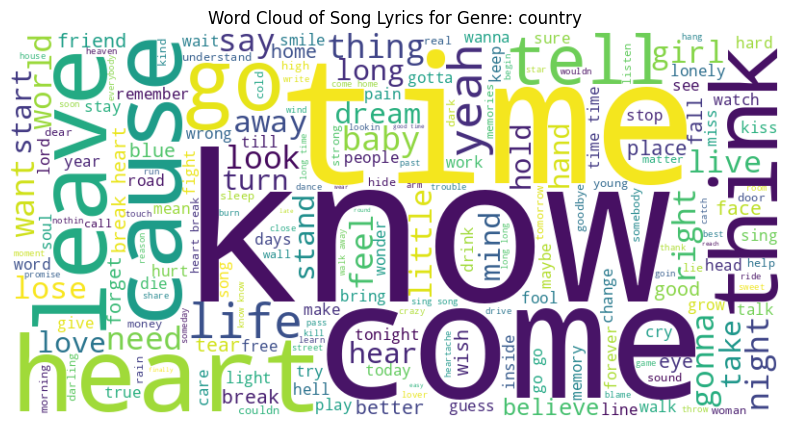

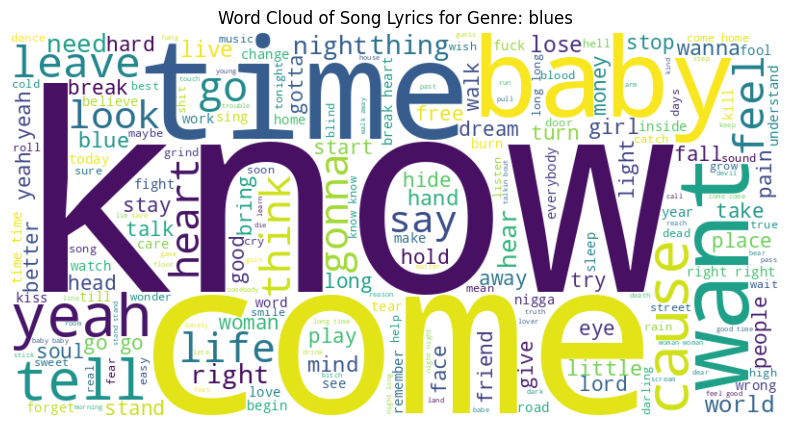

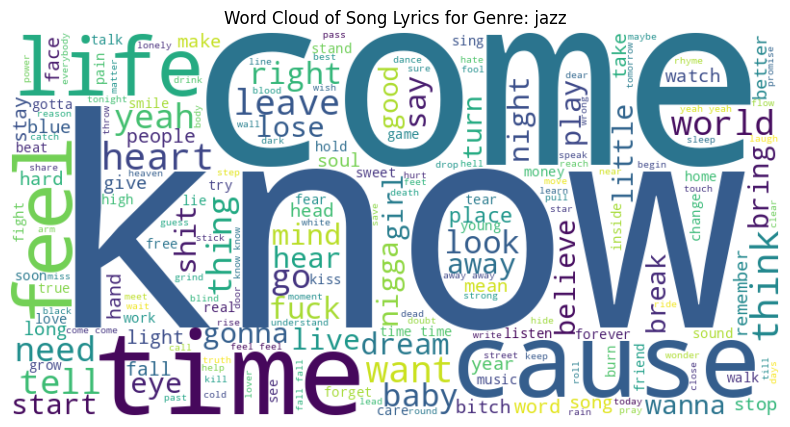

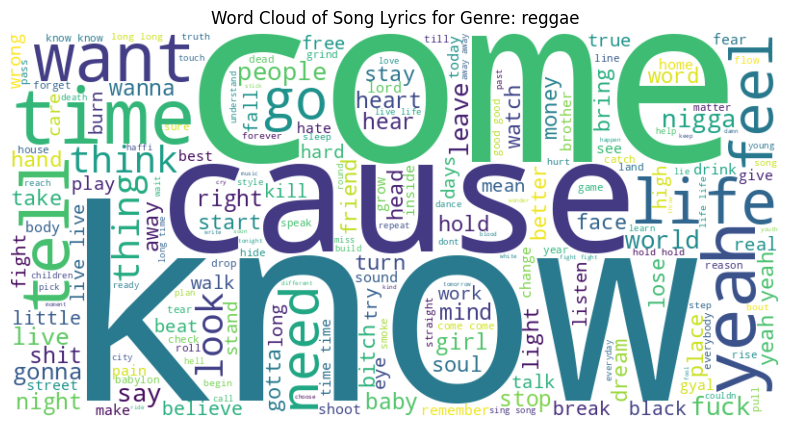

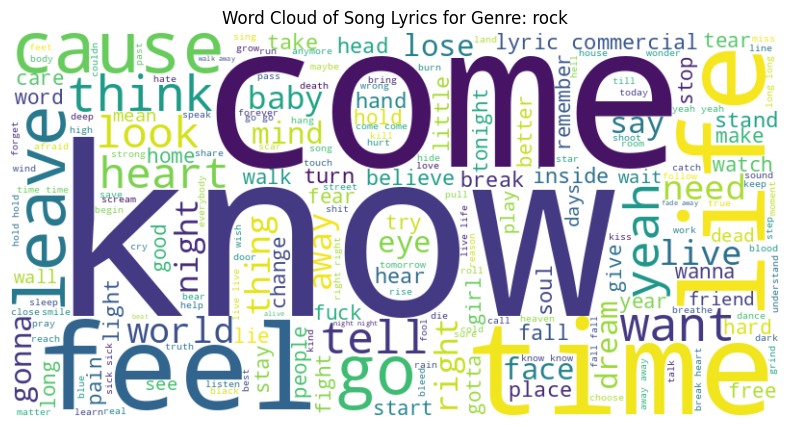

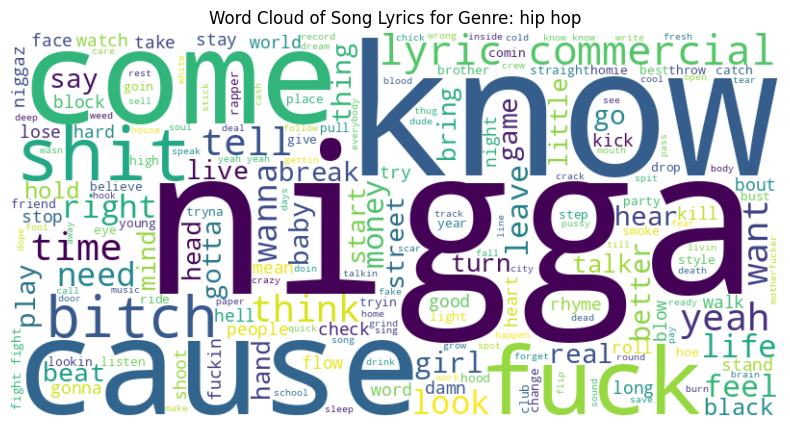

In [12]:
import matplotlib.pyplot as plt

music['lyrics'].fillna('', inplace=True)  # Replace NaN with empty strings

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Genre Distribution
genre_counts = music['genre'].value_counts()
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar',color=colors(np.arange(len(genre_counts))))
plt.xlabel("Genre Classification")
plt.ylabel("Number of Songs")
plt.title("Distribution of Genre Classification")
plt.show()

# Lyrics Length Distribution
lyrics_lengths = music['len']
plt.figure(figsize=(10,5))
plt.hist(lyrics_lengths, bins=50)
plt.xlabel("Lyrics Length")
plt.ylabel("Number of Songs")
plt.title("Distribution of Lyrics Lengths")
plt.show()

# Word Cloud by Genre
for genre in music['genre'].unique():
    subset = music[music['genre'] == genre]
    text = ' '.join(subset['lyrics'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of Song Lyrics for Genre: {genre}")
    plt.show()

In [22]:
import pandas as pd
from collections import Counter

def most_frequent_word(text):
    words = text.lower().split()
    word_counts = Counter(words)
    if word_counts:
        return word_counts.most_common(1)[0][0]
    else:
        return ""


music['most_frequent_word'] = music['lyrics'].apply(most_frequent_word)

# Group by genre and release date, find the most frequent word
genre_word_df = music.groupby(['genre', 'release_date'])['most_frequent_word'].agg(lambda x: x.mode()[0] if not x.mode().empty else '').reset_index()

genre_word_df.head(20)

,genre,release_date,most_frequent_word
0,blues,1950,like
1,blues,1951,basta
2,blues,1953,blue
3,blues,1954,brazos
4,blues,1955,blue
5,blues,1956,good
6,blues,1957,blue
7,blues,1958,baby
8,blues,1959,blue
9,blues,1960,baby
